### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear teniendo como target la columna "duración". Es decir, averigua cuánto aumenta o disminuye la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
- ¿Es la regresión un buen método para este dataset?

In [46]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
#from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [48]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


In [49]:
#Formas first

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


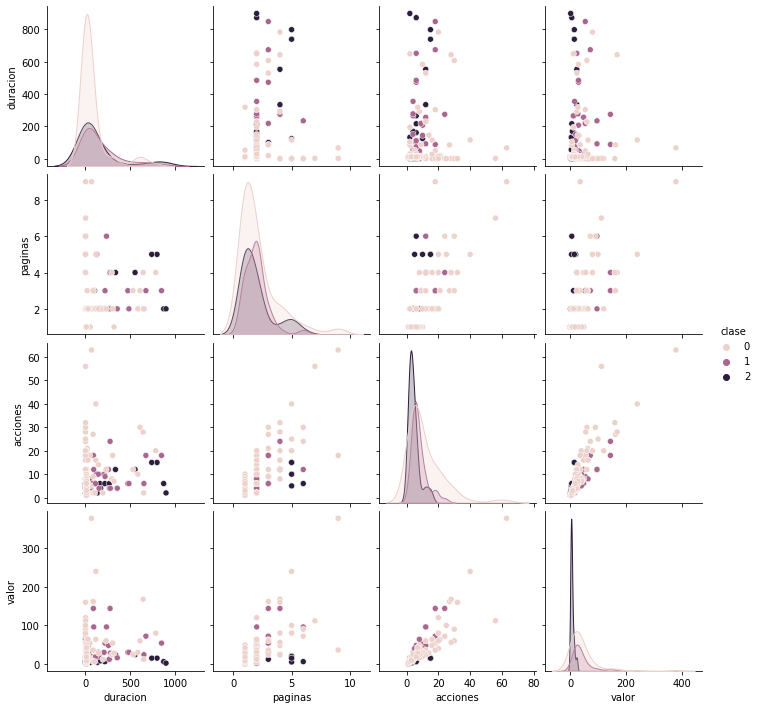

In [51]:
sns.pairplot(df, hue = "clase")

In [52]:
X = df.drop(['duracion'], 1)
y = df['duracion']
print(y.shape)
X.shape

(170,)


(170, 4)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [54]:
model = LinearRegression()

In [55]:
model.fit(X_train,y_train)

LinearRegression()

In [56]:
model.intercept_

8.733487083089997

In [57]:
model.coef_

array([35.71639298,  2.26255727, -0.67826036, 40.11727025])

In [58]:
df_coef = pd.DataFrame(model.coef_, X.columns, columns=['coef_'])
df_coef

,coef_
paginas,35.716393
acciones,2.262557
valor,-0.678260
clase,40.117270


In [59]:
prediction = model.predict(X_test)
prediction

array([ 44.90543242, 121.19464802,  45.58876096, 121.65020037,
       275.47147704, 127.4025302 ,  46.27208949, 147.89122094,
       142.5893753 , 115.7685651 ,  80.62182541, 164.02495973,
       115.7685651 ,  40.84600658,  29.99384075,  96.47493082,
        42.19239097,  41.29649077, 127.4025302 , 118.48160656,
        44.90543242,  79.14613558,  51.69817241, 225.18680753,
        38.80615732,  67.09353335, 139.73689206,  43.99939588,
        41.74697495,  31.80084567, 126.26871748, 126.49649366,
        65.58599646,  40.83587024])

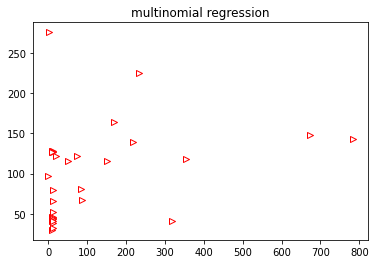

In [60]:
plt.scatter(y_test, prediction, color='white', marker = ">", edgecolor = "red")
plt.title("multinomial regression")
plt.show()

Acierto

In [61]:
model.score(X, y) #R² < 0.5 → Ajuste débil

0.09845731373815292

In [62]:
model.score(X_train, y_train)

0.09545052176463786

In [63]:
model.score(X_test, y_test)

0.11082081675884448

Corresponde a un 8,76% en general. Un score de 14,67% en entrenamiento y 16,58% en test.

ERRORES

In [64]:
print(f'RMSE train: {np.sqrt(mean_squared_error(y_train, model.predict(X_train)))}')

RMSE train: 196.35985832249676


In [65]:
print(f'RMSE test: {np.sqrt(mean_squared_error(y_test, prediction))}')

RMSE test: 171.59079442214488


In [67]:
corr_matrix = df.corr()
corr_matrix

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000
